<h1/>Sales Price Prediction</h1>

# 1. Configuration

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from category_encoders import OneHotEncoder
#Utils


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive, userdata
from sklearn.metrics import mean_squared_log_error
from sklearn.impute import SimpleImputer
import xgboost as xgb

In [3]:
#drive.mount ('/content/drive')


In [4]:
#DATA_DIR = '/content/drive/MyDrive/Kaggle Competition/Data'
DATA_DIR = ''

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

# 1 Data


## 1.1 Load Data

In [6]:
df_train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'), parse_dates = ["date"])
df_test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'), parse_dates = ["date"])
df_holidays = pd.read_csv(os.path.join(DATA_DIR, 'holidays_events.csv'), parse_dates = ["date"])
df_stores = pd.read_csv(os.path.join(DATA_DIR, 'stores.csv'))
df_transactions = pd.read_csv(os.path.join(DATA_DIR, 'transactions.csv'), parse_dates = ["date"])
df_oil = pd.read_csv(os.path.join(DATA_DIR, 'oil.csv'), parse_dates = ["date"])

In [7]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [8]:
df_train.shape

(3000888, 6)

In [9]:
#df_train = df_train[df_train["date"] <= '2014-01-01']

In [10]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [11]:
df_train.shape

(3000888, 6)

In [12]:
df_test.tail()

,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


In [13]:
df_test.shape

(28512, 5)

In [14]:
df_holidays.tail()

,date,type,locale,locale_name,description,transferred
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [15]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [16]:
#df_oil = df_oil[df_oil["date"] <= '2014-01-01']

In [17]:
df_oil.shape

(1218, 2)

In [18]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [19]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [22]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [23]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [24]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [25]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


## 1.2 Data Visualization

Text(0, 0.5, 'Frequência')

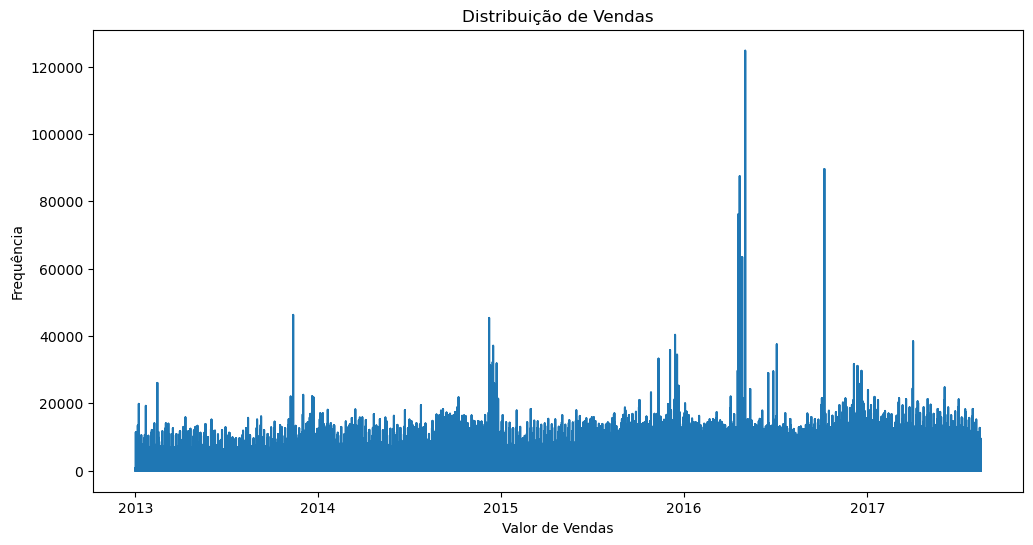

In [26]:
plt.figure(figsize = (12, 6))
plt.plot(df_train['date'], df_train['sales'],
         linestyle='-')
plt.title("Distribuição de Vendas")
plt.xlabel("Valor de Vendas")
plt.ylabel("Frequência")

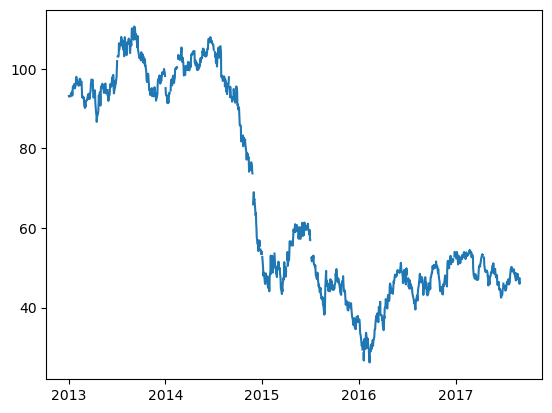

In [27]:
plt.plot(df_oil.date, df_oil.dcoilwtico)

## 1.3 Data Preprocessing


In [28]:
df_train.drop(df_train[df_train.sales > 50000].index, inplace = True)

Text(0, 0.5, 'Frequência')

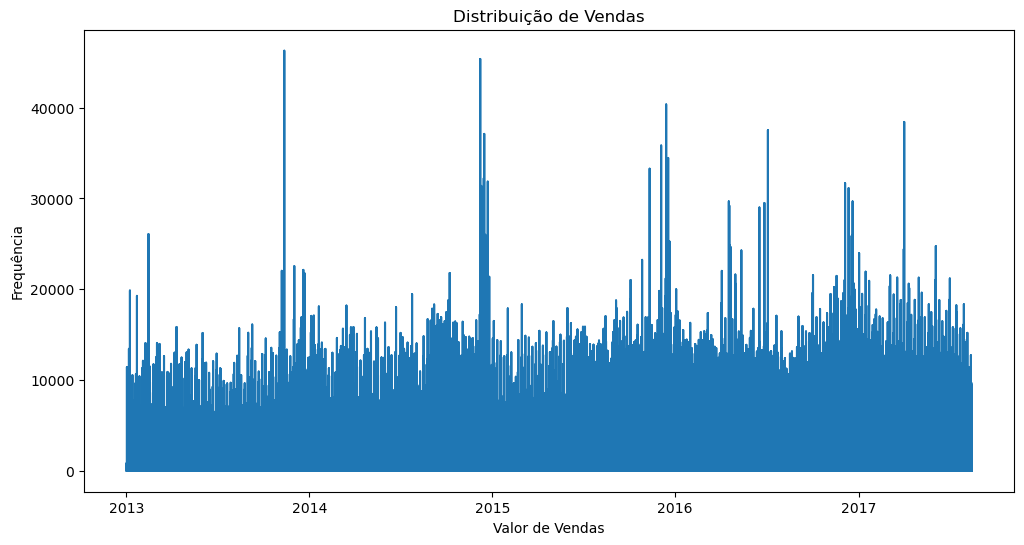

In [29]:
plt.figure(figsize = (12, 6))
plt.plot(df_train['date'], df_train['sales'],
         linestyle='-')
plt.title("Distribuição de Vendas")
plt.xlabel("Valor de Vendas")
plt.ylabel("Frequência")

In [30]:
df_train.family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [31]:
df_train['family_encoded'], unique_labels = pd.factorize(df_train['family'])
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,family_encoded
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,1
2,2,2013-01-01,1,BEAUTY,0.0,0,2
3,3,2013-01-01,1,BEVERAGES,0.0,0,3
4,4,2013-01-01,1,BOOKS,0.0,0,4


In [32]:
df_test['family_encoded'], unique_labels = pd.factorize(df_test['family'])
df_test.head()

,id,date,store_nbr,family,onpromotion,family_encoded
0,3000888,2017-08-16,1,AUTOMOTIVE,0,0
1,3000889,2017-08-16,1,BABY CARE,0,1
2,3000890,2017-08-16,1,BEAUTY,2,2
3,3000891,2017-08-16,1,BEVERAGES,20,3
4,3000892,2017-08-16,1,BOOKS,0,4


In [33]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [34]:
df_oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [35]:
df_oil.dcoilwtico

0         NaN
1       93.14
2       92.97
3       93.12
4       93.20
        ...  
1213    47.65
1214    46.40
1215    46.46
1216    45.96
1217    47.26
Name: dcoilwtico, Length: 1218, dtype: float64

In [36]:
df_oil['dcoil_interpolate'] = df_oil.set_index('date')['dcoilwtico'].interpolate(method = 'time', limit_direction = 'both').values

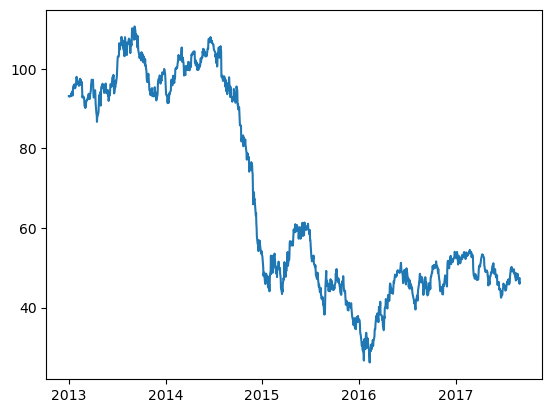

In [37]:
plt.plot(df_oil.date, df_oil.dcoil_interpolate)

In [38]:
df_train = pd.merge(
    df_train,
    df_oil[['date', 'dcoil_interpolate']],  # Selecionar apenas a coluna desejada
    on='date',
    how='left'
)

In [39]:
df_train['dcoil_interpolate'] = df_train['dcoil_interpolate'].fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_11032\3558563980.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_train['dcoil_interpolate'] = df_train['dcoil_interpolate'].fillna(method='ffill')


In [79]:
df_test = pd.merge(
    df_test,
    df_oil[['date', 'dcoil_interpolate']],  # Selecionar apenas a coluna desejada
    on='date',
    how='left'
)

In [80]:
df_test['dcoil_interpolate'] = df_test['dcoil_interpolate'].fillna(method='ffill')

C:\Users\User\AppData\Local\Temp\ipykernel_11032\1593996827.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_test['dcoil_interpolate'] = df_test['dcoil_interpolate'].fillna(method='ffill')


#### Clusters

In [40]:
# Usar a coluna 'cluster' do df_stores
df_train = pd.merge(df_train, df_stores[['store_nbr', 'cluster']], on='store_nbr', how='left')

In [83]:
# Usar a coluna 'cluster' do df_stores
df_test = pd.merge(df_test, df_stores[['store_nbr', 'cluster']], on='store_nbr', how='left')

#### Transactions

In [41]:
# Merge entre df_train e df_transactions
df_train = pd.merge(
    df_train,
    df_transactions[['date', 'store_nbr', 'transactions']],  # Seleciona apenas as colunas necessárias
    on=['date', 'store_nbr'],  # Chaves de junção
    how='left'  # Mantém todas as linhas do df_train, mesmo sem match
)

# Preenche valores ausentes (se não houver transações registradas)
df_train['transactions'] = df_train['transactions'].fillna(0)  # Ou outro valor adequado

In [82]:
# Merge entre df_train e df_transactions
df_test = pd.merge(
    df_test,
    df_transactions[['date', 'store_nbr', 'transactions']],  # Seleciona apenas as colunas necessárias
    on=['date', 'store_nbr'],  # Chaves de junção
    how='left'  # Mantém todas as linhas do df_train, mesmo sem match
)

# Preenche valores ausentes (se não houver transações registradas)
df_test['transactions'] = df_test['transactions'].fillna(0)  # Ou outro valor adequado

In [42]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,family_encoded,dcoil_interpolate,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,93.14,13,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,1,93.14,13,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,2,93.14,13,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,93.14,13,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,4,93.14,13,0.0


#### Setting Holidays

In [43]:
# Eliminating 'Work Day' holidays
df_holidays.drop(df_holidays.type[df_holidays.type == 'Work Day'].index, inplace = True)

In [44]:
# Eliminating transferred holidays
df_holidays.drop(df_holidays.type[df_holidays.transferred == True].index, inplace = True)

In [45]:
df_train = pd.merge(
    df_train,
    df_stores[['store_nbr', 'city', 'state']],  # Selecionando apenas as colunas relevantes do df_stores
    on='store_nbr',  # Coluna chave para o merge
    how='left'       # Mantém todos os registros do df_train, mesmo sem match no df_stores
)
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,family_encoded,dcoil_interpolate,cluster,transactions,city,state
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,93.14,13,0.0,Quito,Pichincha
1,1,2013-01-01,1,BABY CARE,0.0,0,1,93.14,13,0.0,Quito,Pichincha
2,2,2013-01-01,1,BEAUTY,0.0,0,2,93.14,13,0.0,Quito,Pichincha
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,93.14,13,0.0,Quito,Pichincha
4,4,2013-01-01,1,BOOKS,0.0,0,4,93.14,13,0.0,Quito,Pichincha


In [46]:
# Criar dicionários de lookup para feriados
national_dates = set(df_holidays[df_holidays['locale'] == 'National']['date'])
regional_dates = df_holidays[df_holidays['locale'] == 'Regional'].groupby(['date', 'locale_name']).size().reset_index()
local_dates = df_holidays[df_holidays['locale'] == 'Local'].groupby(['date', 'locale_name']).size().reset_index()

# Criar coluna is_holiday
df_train['is_holiday'] = False

# Feriados nacionais
df_train.loc[df_train['date'].isin(national_dates), 'is_holiday'] = True

# Feriados regionais (por estado)
for _, row in regional_dates.iterrows():
    mask = (df_train['date'] == row['date']) & (df_train['state'] == row['locale_name'])
    df_train.loc[mask, 'is_holiday'] = True

# Feriados locais (por cidade ou store_nbr)
for _, row in local_dates.iterrows():
    mask = (df_train['date'] == row['date']) & (
        (df_train['city'] == row['locale_name'])
    )
    df_train.loc[mask, 'is_holiday'] = True

In [47]:
df_test = pd.merge(
    df_test,
    df_stores[['store_nbr', 'city', 'state']],  # Selecionando apenas as colunas relevantes do df_stores
    on='store_nbr',  # Coluna chave para o merge
    how='left'       # Mantém todos os registros do df_train, mesmo sem match no df_stores
)
df_test.head()

,id,date,store_nbr,family,onpromotion,family_encoded,city,state
0,3000888,2017-08-16,1,AUTOMOTIVE,0,0,Quito,Pichincha
1,3000889,2017-08-16,1,BABY CARE,0,1,Quito,Pichincha
2,3000890,2017-08-16,1,BEAUTY,2,2,Quito,Pichincha
3,3000891,2017-08-16,1,BEVERAGES,20,3,Quito,Pichincha
4,3000892,2017-08-16,1,BOOKS,0,4,Quito,Pichincha


In [48]:
# Criar dicionários de lookup para feriados
national_dates = set(df_holidays[df_holidays['locale'] == 'National']['date'])
regional_dates = df_holidays[df_holidays['locale'] == 'Regional'].groupby(['date', 'locale_name']).size().reset_index()
local_dates = df_holidays[df_holidays['locale'] == 'Local'].groupby(['date', 'locale_name']).size().reset_index()

# Criar coluna is_holiday
df_test['is_holiday'] = False

# Feriados nacionais
df_test.loc[df_test['date'].isin(national_dates), 'is_holiday'] = True

# Feriados regionais (por estado)
for _, row in regional_dates.iterrows():
    mask = (df_test['date'] == row['date']) & (df_test['state'] == row['locale_name'])
    df_test.loc[mask, 'is_holiday'] = True

# Feriados locais (por cidade ou store_nbr)
for _, row in local_dates.iterrows():
    mask = (df_test['date'] == row['date']) & (
        (df_test['city'] == row['locale_name'])
    )
    df_test.loc[mask, 'is_holiday'] = True

#### Extracting date components from 'date' column 

In [49]:
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day

In [81]:
df_test['year'] = df_test['date'].dt.year
df_test['month'] = df_test['date'].dt.month
df_test['day'] = df_test['date'].dt.day

In [50]:
# Adicionar features cíclicas para dados temporais
def add_cyclic_features(df):
    # Componentes cíclicos para dia do ano
    df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.dayofyear / 365.25)
    df['day_cos'] = np.cos(2 * np.pi * df['date'].dt.dayofyear / 365.25)

    # Componentes cíclicos para dia da semana (Segunda=0, Domingo=6)
    df['week_sin'] = np.sin(2 * np.pi * df['date'].dt.weekday / 7)
    df['week_cos'] = np.cos(2 * np.pi * df['date'].dt.weekday / 7)
    return df

df_train = add_cyclic_features(df_train)
df_test = add_cyclic_features(df_test)

In [51]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion,family_encoded,dcoil_interpolate,cluster,transactions,city,state,is_holiday,year,month,day,day_sin,day_cos,week_sin,week_cos
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0,93.14,13,0.0,Quito,Pichincha,True,2013,1,1,0.017202,0.999852,0.781831,0.62349
1,1,2013-01-01,1,BABY CARE,0.0,0,1,93.14,13,0.0,Quito,Pichincha,True,2013,1,1,0.017202,0.999852,0.781831,0.62349
2,2,2013-01-01,1,BEAUTY,0.0,0,2,93.14,13,0.0,Quito,Pichincha,True,2013,1,1,0.017202,0.999852,0.781831,0.62349
3,3,2013-01-01,1,BEVERAGES,0.0,0,3,93.14,13,0.0,Quito,Pichincha,True,2013,1,1,0.017202,0.999852,0.781831,0.62349
4,4,2013-01-01,1,BOOKS,0.0,0,4,93.14,13,0.0,Quito,Pichincha,True,2013,1,1,0.017202,0.999852,0.781831,0.62349


In [52]:
df_train.tail()

,id,date,store_nbr,family,sales,onpromotion,family_encoded,dcoil_interpolate,cluster,transactions,city,state,is_holiday,year,month,day,day_sin,day_cos,week_sin,week_cos
3000877,3000883,2017-08-15,9,POULTRY,438.133,0,28,47.57,6,2155.0,Quito,Pichincha,False,2017,8,15,-0.691351,-0.722519,0.781831,0.62349
3000878,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,29,47.57,6,2155.0,Quito,Pichincha,False,2017,8,15,-0.691351,-0.722519,0.781831,0.62349
3000879,3000885,2017-08-15,9,PRODUCE,2419.729,148,30,47.57,6,2155.0,Quito,Pichincha,False,2017,8,15,-0.691351,-0.722519,0.781831,0.62349
3000880,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,31,47.57,6,2155.0,Quito,Pichincha,False,2017,8,15,-0.691351,-0.722519,0.781831,0.62349
3000881,3000887,2017-08-15,9,SEAFOOD,16.000,0,32,47.57,6,2155.0,Quito,Pichincha,False,2017,8,15,-0.691351,-0.722519,0.781831,0.62349


In [53]:
cols_to_use = ['store_nbr', 'onpromotion', 'family_encoded', 'week_sin', 'week_cos', 'dcoil_interpolate', 'is_holiday', 'day', 'month',
               'year', 'day_sin', 'day_cos', 'cluster', 'transactions']
X = df_train[cols_to_use]
y = df_train['sales']

## 2 Split and Model

### 2.1 DecisionTreeRegressor

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size = 0.1)

In [73]:
model = DecisionTreeRegressor(random_state = 1024)

In [74]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1024)

In [75]:
importancias = model.feature_importances_

#Criar um DataFrame para visualização
importancias_df = pd.DataFrame({
    'Feature': X.columns,
    'Importância': importancias
}).sort_values(by='Importância', ascending=False)

print(importancias_df)


              Feature  Importância
2      family_encoded     0.424291
13       transactions     0.229239
1         onpromotion     0.208553
0           store_nbr     0.027296
12            cluster     0.020844
9                year     0.020272
5   dcoil_interpolate     0.020208
10            day_sin     0.013883
3            week_sin     0.010605
11            day_cos     0.007738
8               month     0.006347
7                 day     0.005520
4            week_cos     0.004285
6          is_holiday     0.000919


In [76]:
predictions = model.predict(X_test)

In [77]:
np.sqrt(mean_squared_log_error(predictions, y_test))

0.691261091686139